# David Catá y su música

## Authentication and initializing the API

Save your client ID and your client secret in your preferred way, and read it or load it into the following variables:

In [48]:
CLIENT_ID = "4109b2d9f5014671863bb2df1d1fbdd3"
CLIENT_SECRET = "5cb719fae80c4191a9c0b288f51bfe50"

In [49]:
# If you havent done so, install the spotipy wrapper
!pip install spotipy --upgrade

Once you have done it, we will start initializing the API.

In [50]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [51]:

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
                                                           client_secret=CLIENT_SECRET))


In [52]:

# Modificar la función para agregar un timestamp
def agregar_timestamp(df_canciones):
    # Obtener la fecha y hora actual
    timestamp_actual = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    
    # Agregar una nueva columna llamada 'timestamp' con el valor actual a cada fila del DataFrame
    df_canciones['timestamp'] = timestamp_actual

    return df_canciones


## Creamos funciones para extraer la información sobre el artista

In [53]:
# Función para obtener todas las canciones de un artista con sus características de audio
def obtener_todas_las_canciones_con_caracteristicas(id_artista):
    # Obtener todos los álbumes del artista
    results = sp.artist_albums(id_artista, album_type='album')
    albums = results['items']
    
    # Recopilar todas las canciones con sus características de audio
    canciones = []

    for album in albums:
        album_id = album['id']
        album_name = album['name']
        album_release_date = album['release_date']
        
        # Obtener las canciones de cada álbum
        tracks = sp.album_tracks(album_id)

        for track in tracks['items']:
            track_id = track['id']
            
            # Obtener características de audio de la canción
            audio_features = sp.audio_features(track_id)[0]
            
            if audio_features:  # Verificar que se obtuvieron las características de audio
                cancion_info = {
                    'id': track['id'],
                    'nombre': track['name'],
                    'artistas': ', '.join([artist['name'] for artist in track['artists']]),
                    'álbum': album_name,
                    'fecha_lanzamiento': album_release_date,
                    'duracion_ms': track['duration_ms'],
                    'popularidad': sp.track(track['id'])['popularity'],  # Obtener la popularidad de la canción
                    'acousticness': audio_features['acousticness'],
                    'danceability': audio_features['danceability'],
                    'energy': audio_features['energy'],
                    'instrumentalness': audio_features['instrumentalness'],
                    'liveness': audio_features['liveness'],
                    'loudness': audio_features['loudness'],
                    'speechiness': audio_features['speechiness'],
                    'tempo': audio_features['tempo'],
                    'valence': audio_features['valence']
                }
                canciones.append(cancion_info)

    # Crear un DataFrame con todas las canciones y sus características de audio
    df_canciones_completo = pd.DataFrame(canciones)
    return df_canciones_completo

# ID del artista (por ejemplo, David Catá)
id_artista = '6PXw89KOEkWsfVv3ioubfi'

# Obtener todas las canciones del artista con sus características
df_canciones = obtener_todas_las_canciones_con_caracteristicas(id_artista)


In [54]:
df_canciones = agregar_timestamp(df_canciones)
# Ruta al archivo CSV
ruta_csv = 'canciones_david_cata.csv'

# Guardar en el CSV. Si el archivo no existe, lo creará, si existe, agregará las nuevas filas
# Verificamos si el archivo ya existe
try:
    # Si el archivo existe, agregamos nuevas filas con el modo 'append' y sin duplicar el encabezado
    open (ruta_csv, 'r')
    df_canciones.to_csv(ruta_csv, mode='a', index=False, header=False)
    print("Datos agregados correctamente al CSV existente.")
except FileNotFoundError:
    # Si el archivo no existe, lo creamos con encabezado
    df_canciones.to_csv(ruta_csv, mode='w', index=False, header=True)
    print("Archivo CSV creado y datos guardados correctamente.")


Archivo CSV creado y datos guardados correctamente.


In [55]:

# Mostrar las primeras filas para verificar
df_canciones.head()


,id,nombre,artistas,álbum,fecha_lanzamiento,duracion_ms,popularidad,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,timestamp
0,1ceoA14xwjx2V1kc15Un5I,Origen,"David Catá, David Rodríguez Casas, Q-Art Ensemble",ORIGEN,2022-12-02,158115,4,0.822,0.483,0.2940,0.930,0.1220,-10.982,0.0312,120.007,0.0577,2024-10-03 17:13:11
1,2p1o1mrEGwB2SEASechpyZ,Un día gris,"David Catá, David Rodríguez Casas",ORIGEN,2022-12-02,163535,3,0.983,0.330,0.0929,0.937,0.1110,-18.946,0.0449,60.164,0.1120,2024-10-03 17:13:11
2,3mzXGAbWOWOk3hbXsuPGnX,Sete pétalos de rosa,"David Catá, David Rodríguez Casas, Q-Art Ensemble",ORIGEN,2022-12-02,203665,3,0.741,0.170,0.2000,0.815,0.0986,-13.596,0.0368,82.796,0.1560,2024-10-03 17:13:11
3,38ew94pokECd9ANCUiCziS,Bajo mi piel,"David Catá, David Rodríguez Casas, Q-Art Ensemble",ORIGEN,2022-12-02,216958,3,0.422,0.415,0.2880,0.849,0.0910,-9.287,0.0300,111.645,0.2230,2024-10-03 17:13:11
4,14aAb3WYCF6DQPj5DAwl5q,Déjame volar,"David Catá, David Rodríguez Casas, Q-Art Ensemble",ORIGEN,2022-12-02,182018,2,0.757,0.257,0.2560,0.747,0.1180,-11.440,0.0344,153.641,0.1820,2024-10-03 17:13:11


<h3>El DataFrame df_canciones contendrá la siguiente información para cada canción:</h3>

<p>id: ID de la canción en Spotify.</p>
<p>nombre: Nombre de la canción.</p>
<p>artistas: Nombre(s) del/de los artista(s).</p>
<p>album: Nombre del álbum al que pertenece la canción.</p>
<p>fecha_lanzamiento: Fecha de lanzamiento del álbum.</p>
<p>duracion_ms: Duración de la canción en milisegundos.</p>
<p>popularidad: Un valor entre 0 y 100 que indica la popularidad de la canción.</p>
<p>preview_url: URL de una muestra de 30 segundos de la canción.</p>
<p>acousticness: Medida de lo acústica que es la canción (0.0 a 1.0).</p>
<p>danceability: Medida de lo bailable que es la canción (0.0 a 1.0).</p>
<p>energy: Medida de la energía de la canción (0.0 a 1.0).</p>
<p>instrumentalness: Medida de cuán instrumental es la canción (0.0 a 1.0).</p>
<p>liveness: Medida de la probabilidad de que la canción se grabó en vivo (0.0 a 1.0).</p>
<p>loudness: Volumen general de la pista en decibelios.</p>
<p>speechiness: Medida de la cantidad de palabras habladas en la canción (0.0 a 1.0).</p>
<p>tempo: Tempo estimado de la canción en pulsaciones por minuto (BPM).</p>
<p>valence: Medida de la musicalidad de la canción, de lo positivo o negativo que suena (0.0 a 1.0).</p>

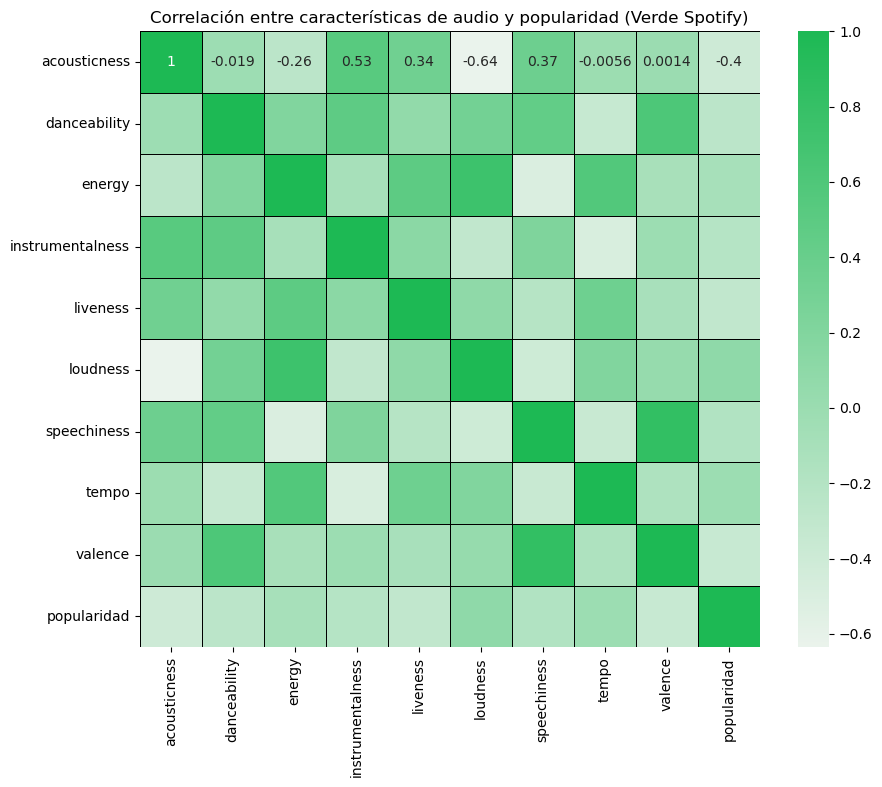

In [56]:
# Definir la función para obtener la matriz de correlación
def crear_heatmap_verde(df_canciones):
    # Seleccionar solo las columnas numéricas que representan las características de audio
    caracteristicas_audio = df_canciones[['acousticness', 'danceability', 'energy', 
                                          'instrumentalness', 'liveness', 'loudness', 
                                          'speechiness', 'tempo', 'valence', 'popularidad']]

    # Calcular la matriz de correlación
    matriz_correlacion = caracteristicas_audio.corr()

    # Crear una paleta de colores verdes personalizada
    verde_spotify = sns.light_palette("#1DB954", as_cmap=True)

    # Configurar el tamaño de la figura
    plt.figure(figsize=(10, 8))

    # Crear un heatmap usando la paleta de colores verdes
    sns.heatmap(matriz_correlacion, annot=True, cmap=verde_spotify, linewidths=0.5, linecolor='black')

    # Configurar el título y las etiquetas
    plt.title('Correlación entre características de audio y popularidad (Verde Spotify)')
    plt.show()

# Llamar a la función para crear el heatmap con el DataFrame df_canciones
crear_heatmap_verde(df_canciones)


In [57]:
# Obtener discografía completa (álbumes y singles)
albums = sp.artist_albums(id_artista, album_type='album,single', limit=50)['items']

# Extraer detalles de los álbumes
album_data = []
for album in albums:
    album_info = {
        'nombre_album': album['name'],
        'fecha_lanzamiento': album['release_date'],
        'total_tracks': album['total_tracks'],
        'id_album': album['id']
    }
    album_data.append(album_info)

# Convertir a DataFrame
df_albums = pd.DataFrame(album_data)
df_albums.sort_values(by='fecha_lanzamiento', ascending=True, inplace=True)

# Mostrar el DataFrame con los álbumes
df_albums.head()

,nombre_album,fecha_lanzamiento,total_tracks,id_album
3,Presentimiento,2022-11-10,1,1EQeKG6ULz1arQdXwKtsrM
2,EN LA PIEL,2022-11-24,1,2zNfrceYXm6Ai4LuKkx1DT
0,ORIGEN,2022-12-02,12,5G7IYO998olKkyliC0bEht
1,Una rosa de papel,2024-08-16,1,2N5UFXZyWdWRlyTkWlXhyW


In [58]:
# Obtener la popularidad de las canciones
popularity_data = []

for album_id in df_albums['id_album']:
    tracks = sp.album_tracks(album_id)['items']
    for track in tracks:
        track_info = {
            'id_cancion': track['id'],
            'nombre_cancion': track['name'],
            'popularidad': sp.track(track['id'])['popularity'],
            'album': df_albums[df_albums['id_album'] == album_id]['nombre_album'].values[0]
        }
        popularity_data.append(track_info)

# Convertir a DataFrame
df_popularity = pd.DataFrame(popularity_data)
df_popularity.sort_values(by='popularidad', ascending=False, inplace=True)

# Mostrar el DataFrame con la popularidad de las canciones
df_popularity.head()


,id_cancion,nombre_cancion,popularidad,album
14,1WrMwgGVDpUwvPo6n40KZd,Una rosa de papel,23,Una rosa de papel
0,4dkBNcsncjRDCNbP7fvgvA,Presentimiento,6,Presentimiento
9,1wH0tiaLdUPzbmh2ZrQlgc,Presentimiento,6,ORIGEN
2,1ceoA14xwjx2V1kc15Un5I,Origen,4,ORIGEN
3,2p1o1mrEGwB2SEASechpyZ,Un día gris,3,ORIGEN


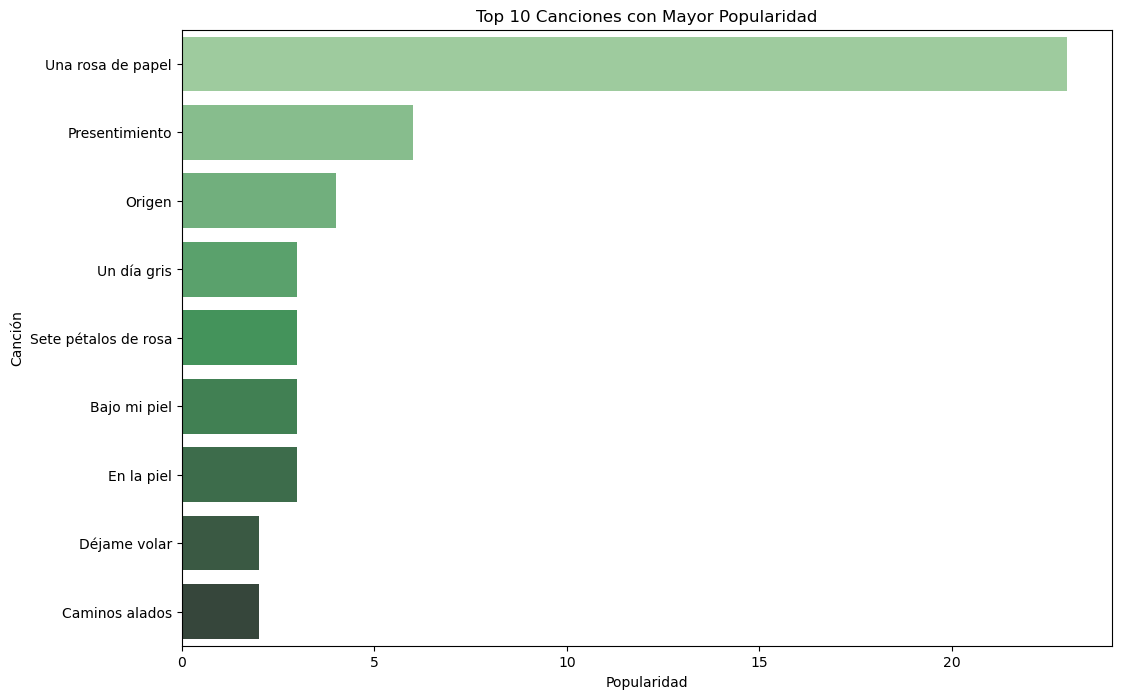

In [59]:
# Asegurarte de que el DataFrame está ordenado por popularidad
df_popularity = df_popularity.sort_values(by='popularidad', ascending=False)

# Seleccionar las 10 canciones más populares (puedes ajustar el número según prefieras)
top_10_canciones = df_popularity.head(10)

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear un gráfico de barras con seaborn
sns.barplot(x='popularidad', y='nombre_cancion', data=top_10_canciones, palette='Greens_d')

# Configurar los títulos y etiquetas del gráfico
plt.title('Top 10 Canciones con Mayor Popularidad')
plt.xlabel('Popularidad')
plt.ylabel('Canción')

# Mostrar el gráfico
plt.show()


In [60]:
# Obtener artistas relacionados
related_artists = sp.artist_related_artists(id_artista)

# Extraer detalles de los artistas relacionados
related_artists_data = []
for artist in related_artists['artists']:
    artist_info = {
        'nombre': artist['name'],
        'popularidad': artist['popularity'],
        'géneros': artist['genres'],
        'seguidores': artist['followers']['total'],
        'id_artista': artist['id']
    }
    related_artists_data.append(artist_info)

# Convertir a DataFrame
df_related_artists = pd.DataFrame(related_artists_data)

# Mostrar el DataFrame con los artistas relacionados
df_related_artists


,nombre,popularidad,géneros,seguidores,id_artista
0,David Rodríguez Casas,5,[],31,3OPFDPmVaZrZoSsDq72JPo
1,Fillas de Cassandra,44,[galego],22386,4OETSqPg52NUKHEQEroph5
2,Guadi Galego,31,"[galego, spanish folk]",13504,4qiV7esJIt796GLcTRO0a4
3,Sabela,26,[latin talent show],21983,78fi6hiTjEQH8KQLzDqVRg
4,Catuxa Salom,17,[galego],2665,7pNENbSuiojM2b6ae53ecA
5,Mondra,33,[galego],6275,7hETI0LkHsxAb0Mil6OCWx
6,Tanxugueiras,47,[galician folk],101563,1iHb53TMjvMaXZm0s4RWZi
7,Lontreira,31,[galego],3460,69j5CzSpVSX4LHgFP6xAkM
8,Berto,39,[galego],3417,7AKh8HXKj8nJqm8xUcJJAy
